### 예제
1. drinks.csv 파일 로드
2. 결측치를 확인
3. 데이터프레임의 정보 출력
4. continent 컬럼에서 결측치 존재 -> 결측치 'OT'로 대체
5. continent 별 spirit_servings 컬럼의 평균, 최소, 최대, 합쳬를 출력
6. total_liters_of_pure_alcohol 컬럼의 평균보다 높은 continent가 어디인지 출력
7. 국가별 술 소비량 대비 알콜 비율 컬럼 추가

In [1]:
import pandas as pd

In [2]:
# 파일 업로드
drinks = pd.read_csv("../csv/drinks.csv")
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [3]:
# 결측치 확인
drinks.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [4]:
# 데이터프레임의 정보
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [5]:
# 결측치를 'OT'로 대체
# 결측치를 대체하는 함수 -> fillna('OT')
# drinks.loc[결측치인 조건, 'continent'] = 'OT'
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.loc[drinks['continent'].isna(), 'continent'] = 'OT'

In [6]:
# continent 별 spirit_servings 컬럼의 평균, 최소, 최대, 합계를 출력
group_data = drinks[['continent', 'spirit_servings']].groupby('continent').agg(['mean', 'min', 'max', 'sum'])

In [7]:
group_data

spirit_servings               
                     mean min  max   sum
continent                               
AF              16.339623   0  152   866
AS              60.840909   0  326  2677
EU             132.555556   0  373  5965
OC              58.437500   0  254   935
OT             165.739130  68  438  3812
SA             114.750000  25  302  1377

In [8]:
group_data2 = pd.pivot_table(
    drinks,
    index = 'continent',
    values = 'spirit_servings',
    aggfunc = ["mean", "min", "max", "sum"]
)

In [9]:
import matplotlib.pyplot as plt

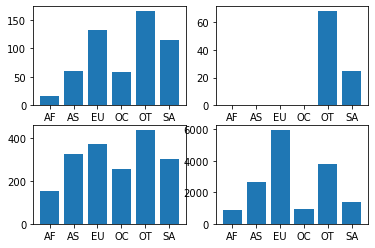

In [10]:
# 바형 그래프
# 한 화면에 4개의 그래프
# bar() x와 y의 값이 필수 항목
x = group_data.index

# subplot(행의 수, 열의 수, 영역 지정)
plt.subplot(2, 2, 1)
plt.bar(x, group_data['spirit_servings']['mean'])
plt.subplot(2, 2, 2)
plt.bar(x, group_data['spirit_servings']['min'])
plt.subplot(2, 2, 3)
plt.bar(x, group_data['spirit_servings']['max'])
plt.subplot(2, 2, 4)
plt.bar(x, group_data['spirit_servings']['sum'])

plt.show()

In [11]:
# 전체 알콜의 소비량이 평균보다 높은 대륙은 어디인가?

# 전체 알콜의 소비량 평균
total_mean = drinks['total_litres_of_pure_alcohol'].mean()

In [12]:
group_data3 = drinks[['continent', 'total_litres_of_pure_alcohol']].groupby('continent').mean()['total_litres_of_pure_alcohol']

In [13]:
group_data3

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [14]:
group_data3[group_data3 > total_mean]

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [15]:
# 국가별 술 소비량 대비 알콜 비율 생성
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [16]:
drinks['total_servings'] = drinks['beer_servings'] + drinks['spirit_servings'] + drinks['wine_servings']

In [17]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319


In [18]:
# 술 소비량 대비 알콜 비율 파생변수 생성
# 알콜 소비량 / 술 소비량 * 100
# 결측치가 나온다면 0으로 대체
drinks['alcohol_rate'] = (drinks['total_litres_of_pure_alcohol'] / drinks['total_servings'] * 100).fillna(0)

In [19]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,1.781818
2,Algeria,25,0,14,0.7,AF,39,1.794872
3,Andorra,245,138,312,12.4,EU,695,1.784173
4,Angola,217,57,45,5.9,AF,319,1.849530


In [20]:
# 가장 독한 술을 마시는 나라는 어디인가?
# 우리나라는 얼마나 독한 술을 마시는가?
# 북한은 얼마나 독한 술을 마시는가?
drinks_rank = drinks.sort_values('alcohol_rate', ascending = False, ignore_index = True)

In [21]:
drinks_rank

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Gambia,8,0,1,2.4,AF,9,26.666667
1,Sierra Leone,25,3,2,6.7,AF,30,22.333333
2,Nigeria,42,5,2,9.1,AF,49,18.571429
3,Uganda,45,9,0,8.3,AF,54,15.370370
4,Rwanda,43,2,0,6.8,AF,45,15.111111
...,...,...,...,...,...,...,...,...
188,Maldives,0,0,0,0.0,AS,0,0.000000
189,Libya,0,0,0,0.0,AF,0,0.000000
190,Iran,0,0,0,0.0,AS,0,0.000000
191,Kuwait,0,0,0,0.0,AS,0,0.000000


In [22]:
drinks_rank.loc[drinks_rank['country'] == 'South Korea']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
14,South Korea,140,16,9,9.8,AS,165,5.939394


In [23]:
drinks_rank.loc[drinks_rank['country'] == 'North Korea']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
181,North Korea,0,0,0,0.0,AS,0,0.0


In [24]:
drinks_rank.loc[drinks_rank['country'] == 'South Korea', 'alcohol_rate'].values[0]

5.93939393939394

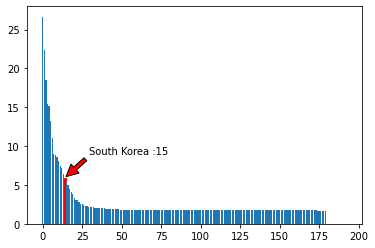

In [25]:
# 시각화
# 우리나라는 그래프에서 표기
x = list(range(len(drinks_rank)))
y = drinks_rank['alcohol_rate']

# 국가 리스트
country_list = drinks_rank['country'].tolist()

bar_list = plt.bar(x, y)

korea_rank = country_list.index('South Korea')
korea_alcohol_rate = drinks_rank.loc[drinks_rank['country'] == 'South Korea', 'alcohol_rate'].values[0]

# 그래프 커스텀
# South Korea의 막대 색상 변경
bar_list[korea_rank].set_color('r')

# 그래프에 글씨와 화살표 추가
plt.annotate('South Korea :' + str(korea_rank + 1),
             xy = (korea_rank, korea_alcohol_rate),
             xytext = (korea_rank + 15, korea_alcohol_rate + 3),
             arrowprops = dict(facecolor = 'r', shrink = 0.05)
             )
plt.show()